<a href="https://colab.research.google.com/github/IvanDaniarAP/MLTask/blob/main/week5/EDA_DiamondsDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## All libraries that i used
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
dia=pd.read_csv("/content/diamonds.csv")
dia.head()
#We can reach first 5 information about data.
#I called the dataset is 'dia'

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
#If we wonder what our columns feature -->obeject,categorical,float,int,... we can use 'dtypes' function.
dia.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [5]:
dia = dia.drop(columns = ["Unnamed: 0"])

In [6]:
dia.describe().T
#I think we can find extra and consisten information about data instead of data_name.describe because data_name.describe() function is tall .
#People can understand easier like that.

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [7]:
# I check where there are NaN values
dia.isnull().any()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

In [8]:
#Calculates the number of rows and columns
print(dia.shape)

(53940, 10)


In [9]:
#If we want to see , First of all we can grouping columns so that it shows every columns price mean.
#That has the difference information from other.
dia.groupby(["cut","color"])["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Ideal      D        2629.094566
           E        2597.550090
           F        3374.939362
           G        3720.706388
           H        3889.334831
           I        4451.970377
           J        4918.186384
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Very Good  D        3470.467284
           E        3214.652083
           F        377

<ipython-input-10-cc53b338fe81>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax=sns.heatmap(dia.corr(),


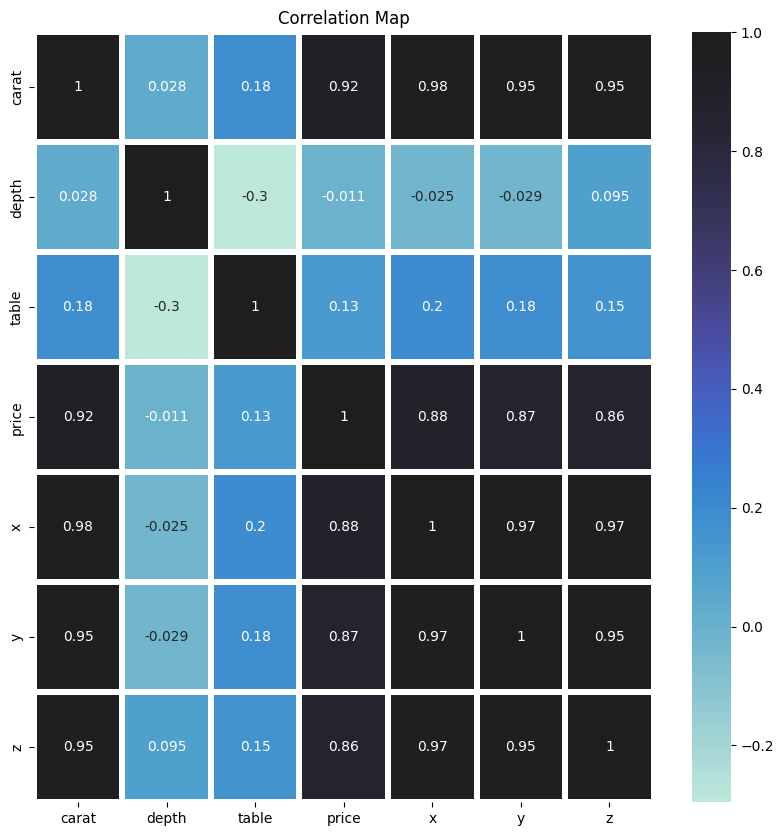

In [10]:
#Correlation Map- Right side shows value of color left side shows values that appeal to colors
plt.figure(figsize=(10,10))
plt.title('Correlation Map')
ax=sns.heatmap(dia.corr(),
               linewidth=3.1,
               annot=True,
               center=1)

<ipython-input-11-c776366eb8ae>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dia.price, kde = False , bins= 20);


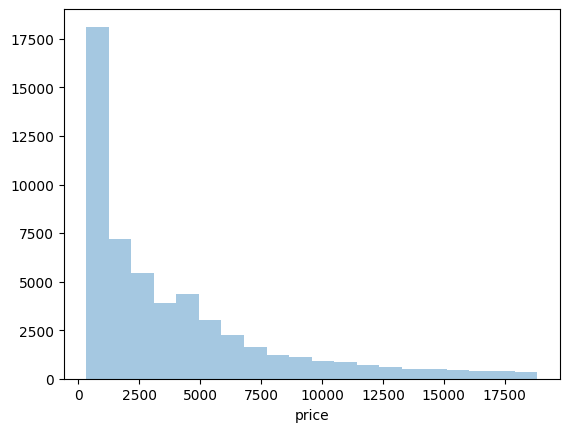

In [11]:
# One of the most important visualization styles is histogram
sns.distplot(dia.price, kde = False , bins= 20);

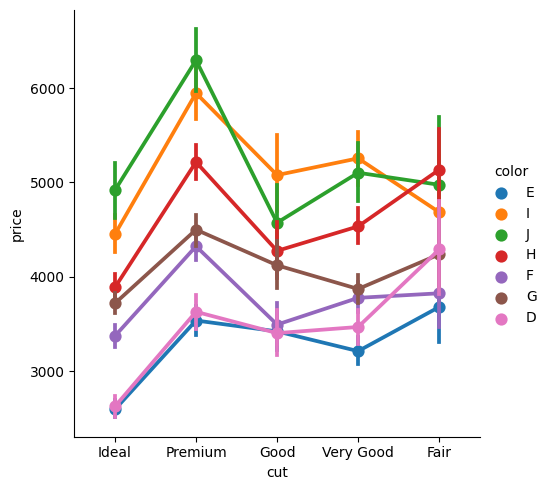

In [12]:
sns.catplot(x="cut",y="price",hue="color",kind="point",data=dia);
#Catplot inside Seaborn function is significiant for me because of awesome . It contributes to Visualization.

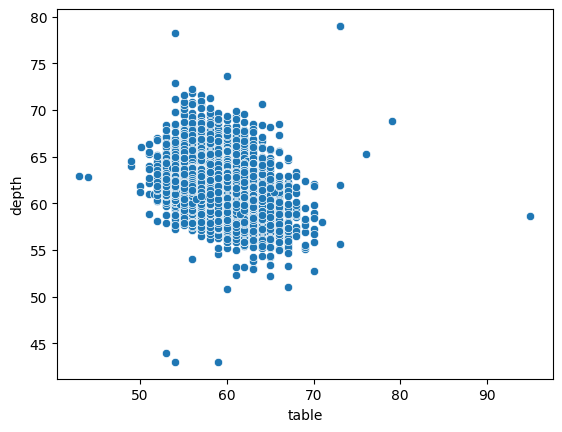

In [13]:
sns.scatterplot(x="table",y="depth",data=dia);
#It gives between relationship table and depth

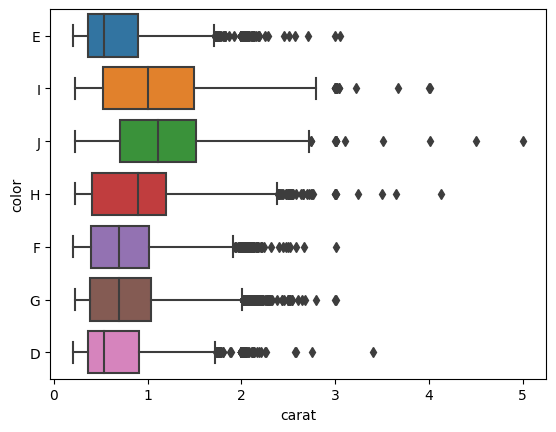

In [14]:
#It is so interesting . I want to demonstrate ratio of carat,color.
# Generally if carat greater than 3 or 2.5 is the outlier value.
sns.boxplot (x="carat",y="color",data=dia);

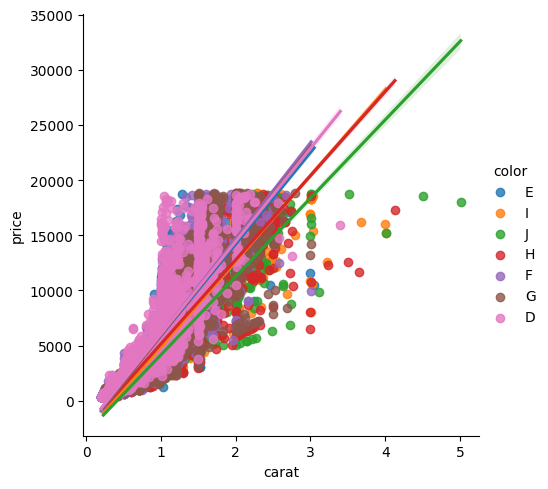

In [15]:
#LMPLOT I think it offers smooth visuals that is why i am always using that method.I think, this method is very useful for ML algorithms.
sns.lmplot(x="carat",y="price",hue = 'color',  data=dia);